# <u>Calcul des forces de pression sur une digue<u>

## <u>Introduction<u>

$p_{eau}(x) = \rho g ( H + x)$

Bilan des forces sur la digue : Poids, reaction du sol rocheux, forces de pression de l'eau et la friction statique béton - roche. La force qui permet à la digue de ne pas glisser est la friction béton - roche.

$\sum \vec{F} = \vec{0}$ 

donc selon ey => $\sum \vec{F_y} = \vec{0}$ 

selon ex => $\sum \vec{F_x} = \vec{0}$

$f_{eau} = -\frac{x_e}{H}.(y-H)$

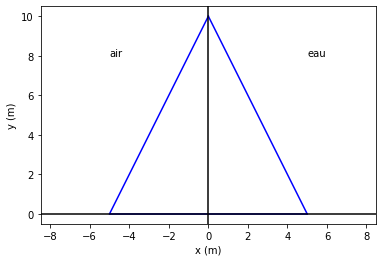

In [1]:
# On importe les modules necéssaires
import numpy as np
import matplotlib.pyplot as plt

# Ce code permet d'afficher les courbes représentant la digue

H = 10
xa = -5
xe = +5


# On définit les fonctions côté eau et côté air, ici les courbes concaves
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return  -(y - H) * xe / H 

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(fair(y), y, '-b')  
plt.plot(feau(y), y, '-b')

plt.plot([xe, xa], [0, 0], '-b')    # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal')                   # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

La forme de la digue est une pyramide à base rectangulaire

## <u>Cas des digues en pentes droites<u>

##### a. Calculez le volume de la digue par intégration de la largeur de la digue en fonction de $y$. Comparez avec le calcul analytique (ici, l'aire du triangle multipliée par la longueur $L=1$). En déduire la force de gravité exercée sur la digue.

In [2]:
import scipy.integrate as si
I = np.array(si.quad(fair, -5, 0))
I1 = np.array(si.quad(feau, 0, 5))
A = np.add(I1, -I)
print(A)

[ 5.00000000e+01 -1.38777878e-13]


Le calcul analytique nous donne le même résultat.

Calcul analytique : aire du triangle = $\frac{base * hauteur}{2}$ 

Dans notre cas : aire du triangle = 50 m$^2$

Poids : $\vec{P} = m\vec{g}$ dans notre cas g pointe vers le sol donc le poids est : -mg avec $m = \rho  V$ et $ g = 9.81$ m/s$^2$  $\rho = 3000 $ kg/m$^3$

Donc $P = - 1.5 * 10^6$ N 

##### b. Pour le cas des fonctions affines, calculez la résultante (vectorielle ; il y a une composante suivant $x$ et une composante suivant $y$) des forces de pression côté eau. On prendra $x_a = -5$, $x_e = +5$, $H=10$. (On ne cherchera pas à faire le calcul analytique !)

Résultante des forces de pression : $ \vec{F} = \vec{p} . \vec{dS}$

selon $\vec{y}$ : $\vec{p} = \rho \vec{g} (H -y) $ 

$dS = Ldl$

or $L = 1$m donc $dS = dl$

avec $dl = \frac{dy}{\cos (\theta)}$

$\rho_{eau} = 1000$ kg/m$^3$ ; 
$\rho_{digue} = 3000$ kg/m$^3$

In [3]:
g = 9.81
rho_eau = 1000
rho_digue = 3000

# Définition de la pression de l'eau
def p_eau(x, y):
    return rho_eau * g * (H-y)
 